# Inferential Analysis on the Impact of Temperature Changes on Climate Change and Global Warming 
### Group 13 STAT 201 Project Proposal

# Introduction

The topic of climate change has become a pressing concern worldwide in recent years, with increased attention on the role of human influence and activities in directing changes in the Earth's climate. One of the most apparent indicators of climate change are the consistent, gradual changes in temperature patterns over time. Although there are decades of scientific climate change research proving its existence, there still seems to be global doubts amongst many groups of people. Given that the world’s oceans have an extremely large heat capacity, the world requires a massive amount of heat energy to raise Earth’s average yearly surface temperature by even a small amount (Lindsey & Dahlman, 2023). This is why there is imminent concern within the scientific community with the rise in global temperature.

In this data analysis project, we aim to estimate and the temperature differences between the second half of the twentieth century (1950-1999) and the first half of the twenty-first century (2000-2050) at one weather station in Vancouver, BC. Because doing a direct comparrison of these periods would be impossible without a time machine, we will use the available temperature data from this weather station over the time periods of 1976 to 1986 and 2012 to 2022 as samples of their respective broader eras in order to estimate the difference. We will then have to perform statistical analysis to ensure that any measured difference is not due to random chance in our sampling. By comparing the two time periods, we hope to gain insights into whether any observed changes in temperature can be attributed to climate change. We also hope to predict and generalize this research analysis to Canada or even the world’s climate. Moreover, we wish to lessen the significant distrust in the rigorous scientific research and raise public awareness in order to limit climate change. Here, we intend to utilize scientific research and peer-reviewed studies by Lindsay & Dahlman (2023), N. W. Arnell, and more to strengthen our analysis and answer our question being asked. The topic of climate change has become a pressing concern worldwide in recent years, with increased attention on the role of human influence and activities in directing changes in the Earth's climate. Although there are decades of scientific climate change research proving its existence, there still seems to be global doubts amongst many groups of people. 

In this data analysis project, we aim to compare temperature data from one weather station over two 11-year periods, namely, 1976-1986 and 2012-2022, to assess whether there has been a statistically significant change in temperature over this time period. By comparing the two time periods, we hope to gain insights into whether the climate is continuing to change in Vancouver in the modern era. We also hope to predict and generalize this research analysis to Canada or even the world’s climate. Moreover, we wish to lessen the significant distrust in the rigorous scientific research and raise public awareness in order to limit climate change. Here, we intend to utilize scientific research and peer-reviewed studies by Lindsay & Dahlman, N. W. Arnell, and more to strengthen our analysis and answer our question being asked. The topic of climate change has become a pressing concern worldwide in recent years, with increased attention on the role of human influence and activities in directing changes in the Earth's climate. Although there are decades of scientific climate change research proving its existence, there still seems to be global doubts amongst many groups of people. 

<h4>Question being answered:</h4>

Is there evidence to suggest a statistically significant increase in temperature between the second half of the twentieth century and the first half the twenty-first century?

# Preliminary Results

### Importing and Wrangling

In [1]:
library(tidyverse)
library(gridExtra)
library(tidyr)
library(dplyr)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# load data from online
data <- read_csv("https://raw.githubusercontent.com/sam-coble/stat200-project/main/vancouver_harbour_weather.csv") |>
    select("Year", "Max Temp (°C)", "Min Temp (°C)", "Mean Temp (°C)")
# Rename columns
colnames(data) <- c("yr", "max", "min", "mean")

# Seperate data into two groups
old_temps <- data |>
    filter(!is.na(max) & !is.na(min) & !is.na(mean)) |>
    filter(yr < 1987) |>
    select(-yr)
new_temps <- data |>
    filter(!is.na(max) & !is.na(min) & !is.na(mean)) |>
    filter(yr > 2011) |>
    select(-yr)

head(old_temps)
head(new_temps)

# Describe columns of interest
summary(data |> select(min, mean, max))

Rows: 8036 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Station Name, Month, Day, Max Temp Flag, Min Temp Flag, Mean Temp...
dbl  (13): Longitude (x), Latitude (y), Climate ID, Year, Max Temp (°C), Min...
lgl   (3): Data Quality, Dir of Max Gust (10s deg), Spd of Max Gust (km/h)
date  (1): Date/Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


max,min,mean
<dbl>,<dbl>,<dbl>
3.3,0.6,2.0
7.2,1.1,4.2
6.7,5.0,5.9
6.7,2.2,4.5
4.4,1.1,2.8
5.6,3.3,4.5


max,min,mean
<dbl>,<dbl>,<dbl>
7.3,3.5,5.4
9.5,2.8,6.2
8.9,7.2,8.1
11.3,8.2,9.8
8.9,5.8,7.4
5.9,4.0,5.0


      min               mean            max       
 Min.   :-10.600   Min.   :-7.90   Min.   :-6.50  
 1st Qu.:  4.300   1st Qu.: 6.80   1st Qu.: 8.90  
 Median :  7.700   Median :10.60   Median :13.40  
 Mean   :  7.968   Mean   :11.08   Mean   :14.16  
 3rd Qu.: 12.200   3rd Qu.:15.70   3rd Qu.:19.30  
 Max.   : 19.200   Max.   :26.00   Max.   :33.80  
 NA's   :56        NA's   :71      NA's   :69     

<center>Table 1. Glimpse of data with specified columns</center>

### Plots and Tables

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


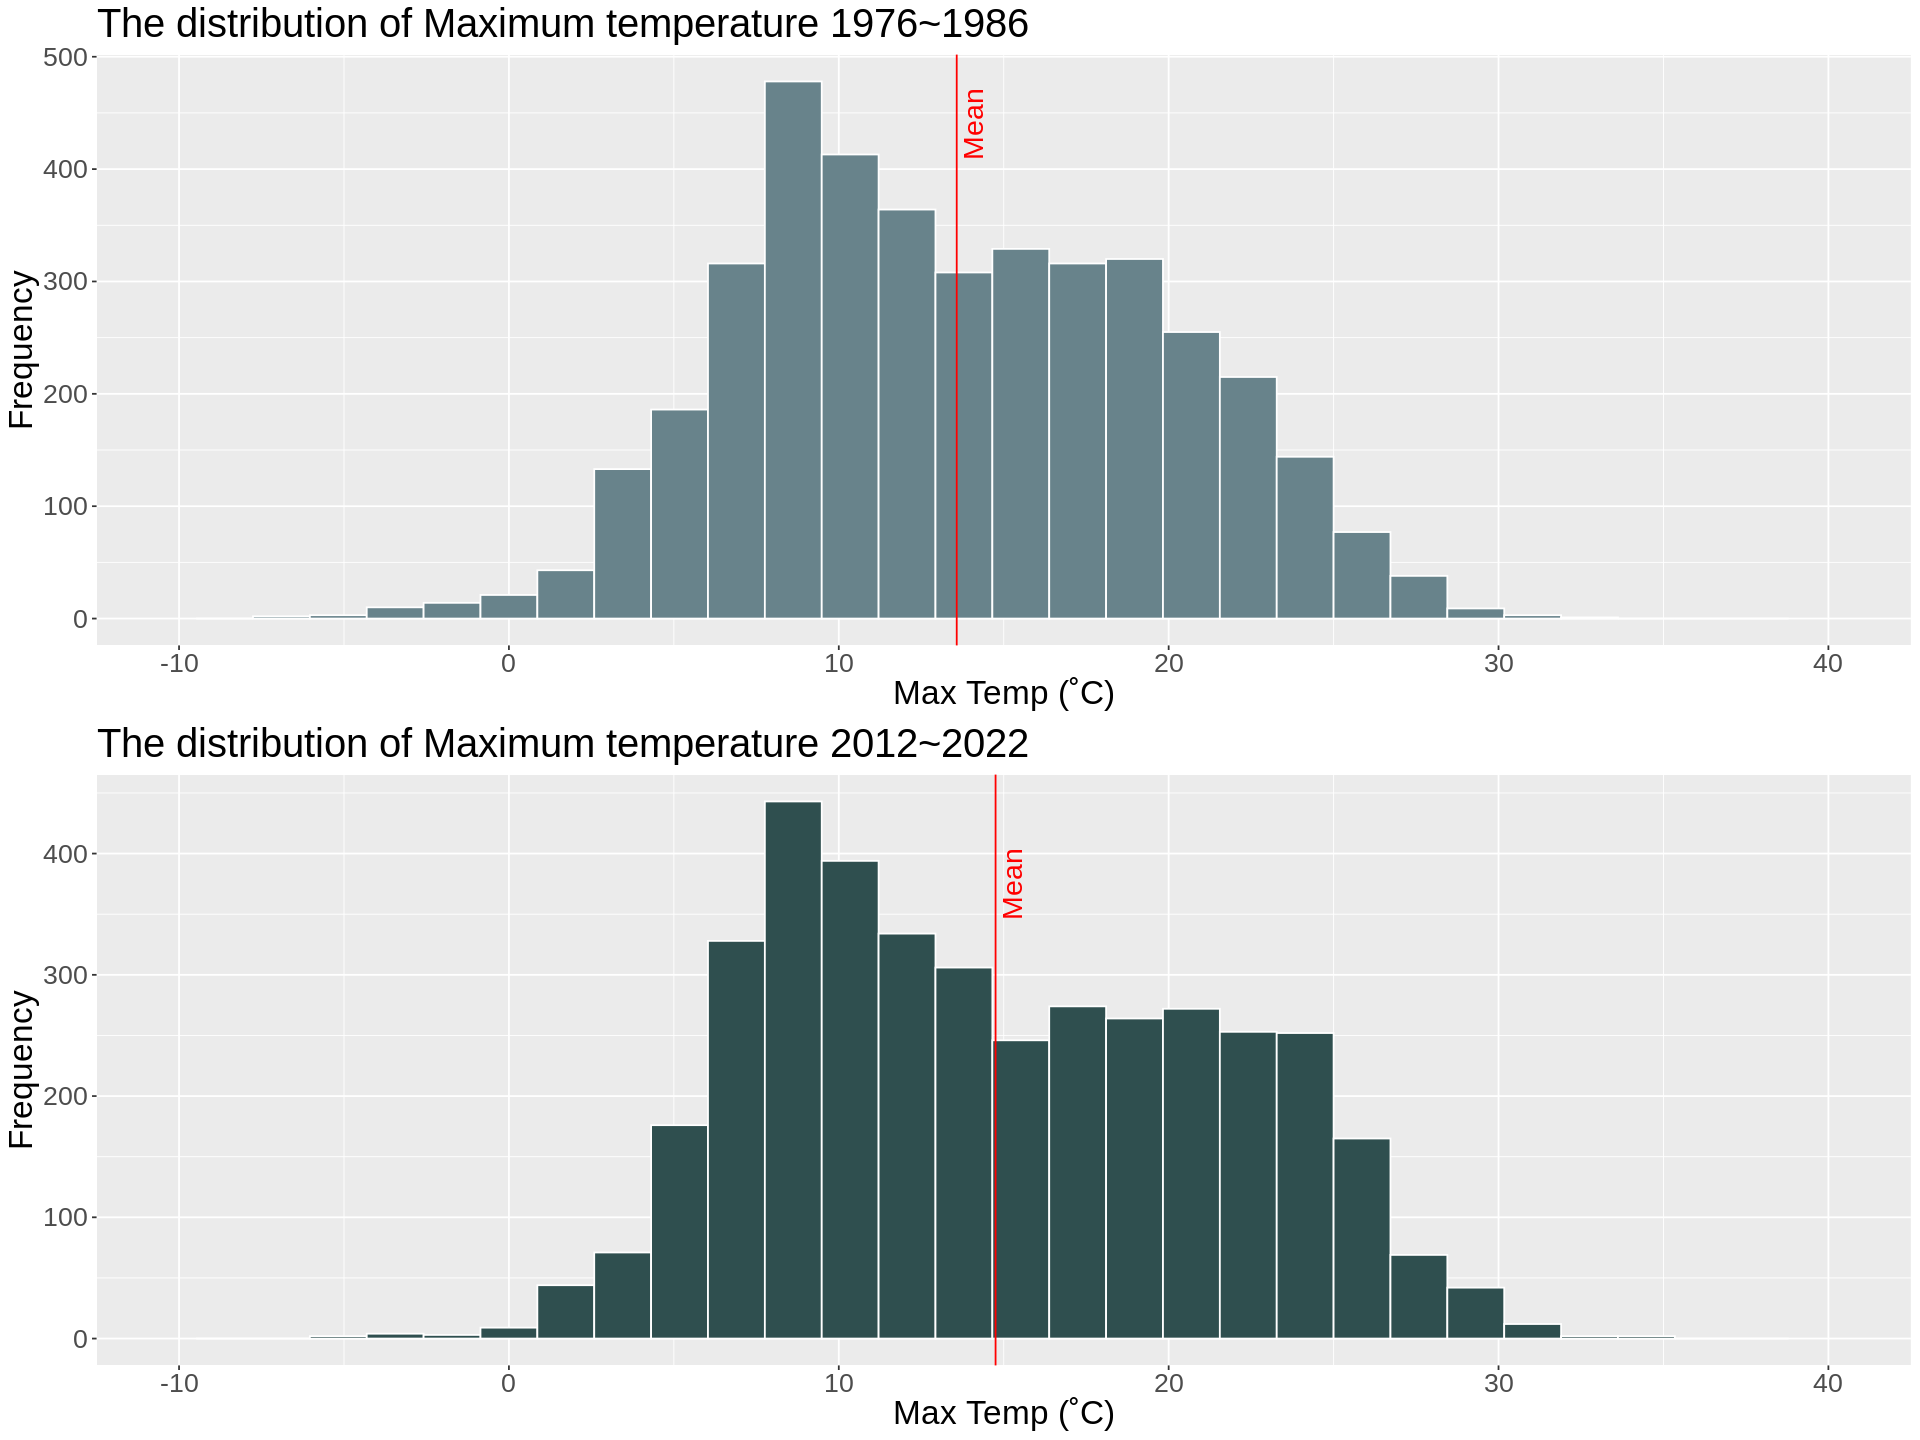

In [3]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$max)
new_mean=mean(new_temps$max)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=max)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 40, by=10),limits=c(-10,40))+
    ggtitle('The distribution of Maximum temperature 1976-1986')+
    xlab('Max Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= old_mean+0.5, y=440, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=max)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 40, by=10),limits=c(-10,40))+
    ggtitle('The distribution of Maximum temperature 2012-2022')+
    xlab('Max Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= new_mean+0.5, y=375, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)


<center>Figure 1. Plots of Maximum Temperature between the two 10-year time periods</center>

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


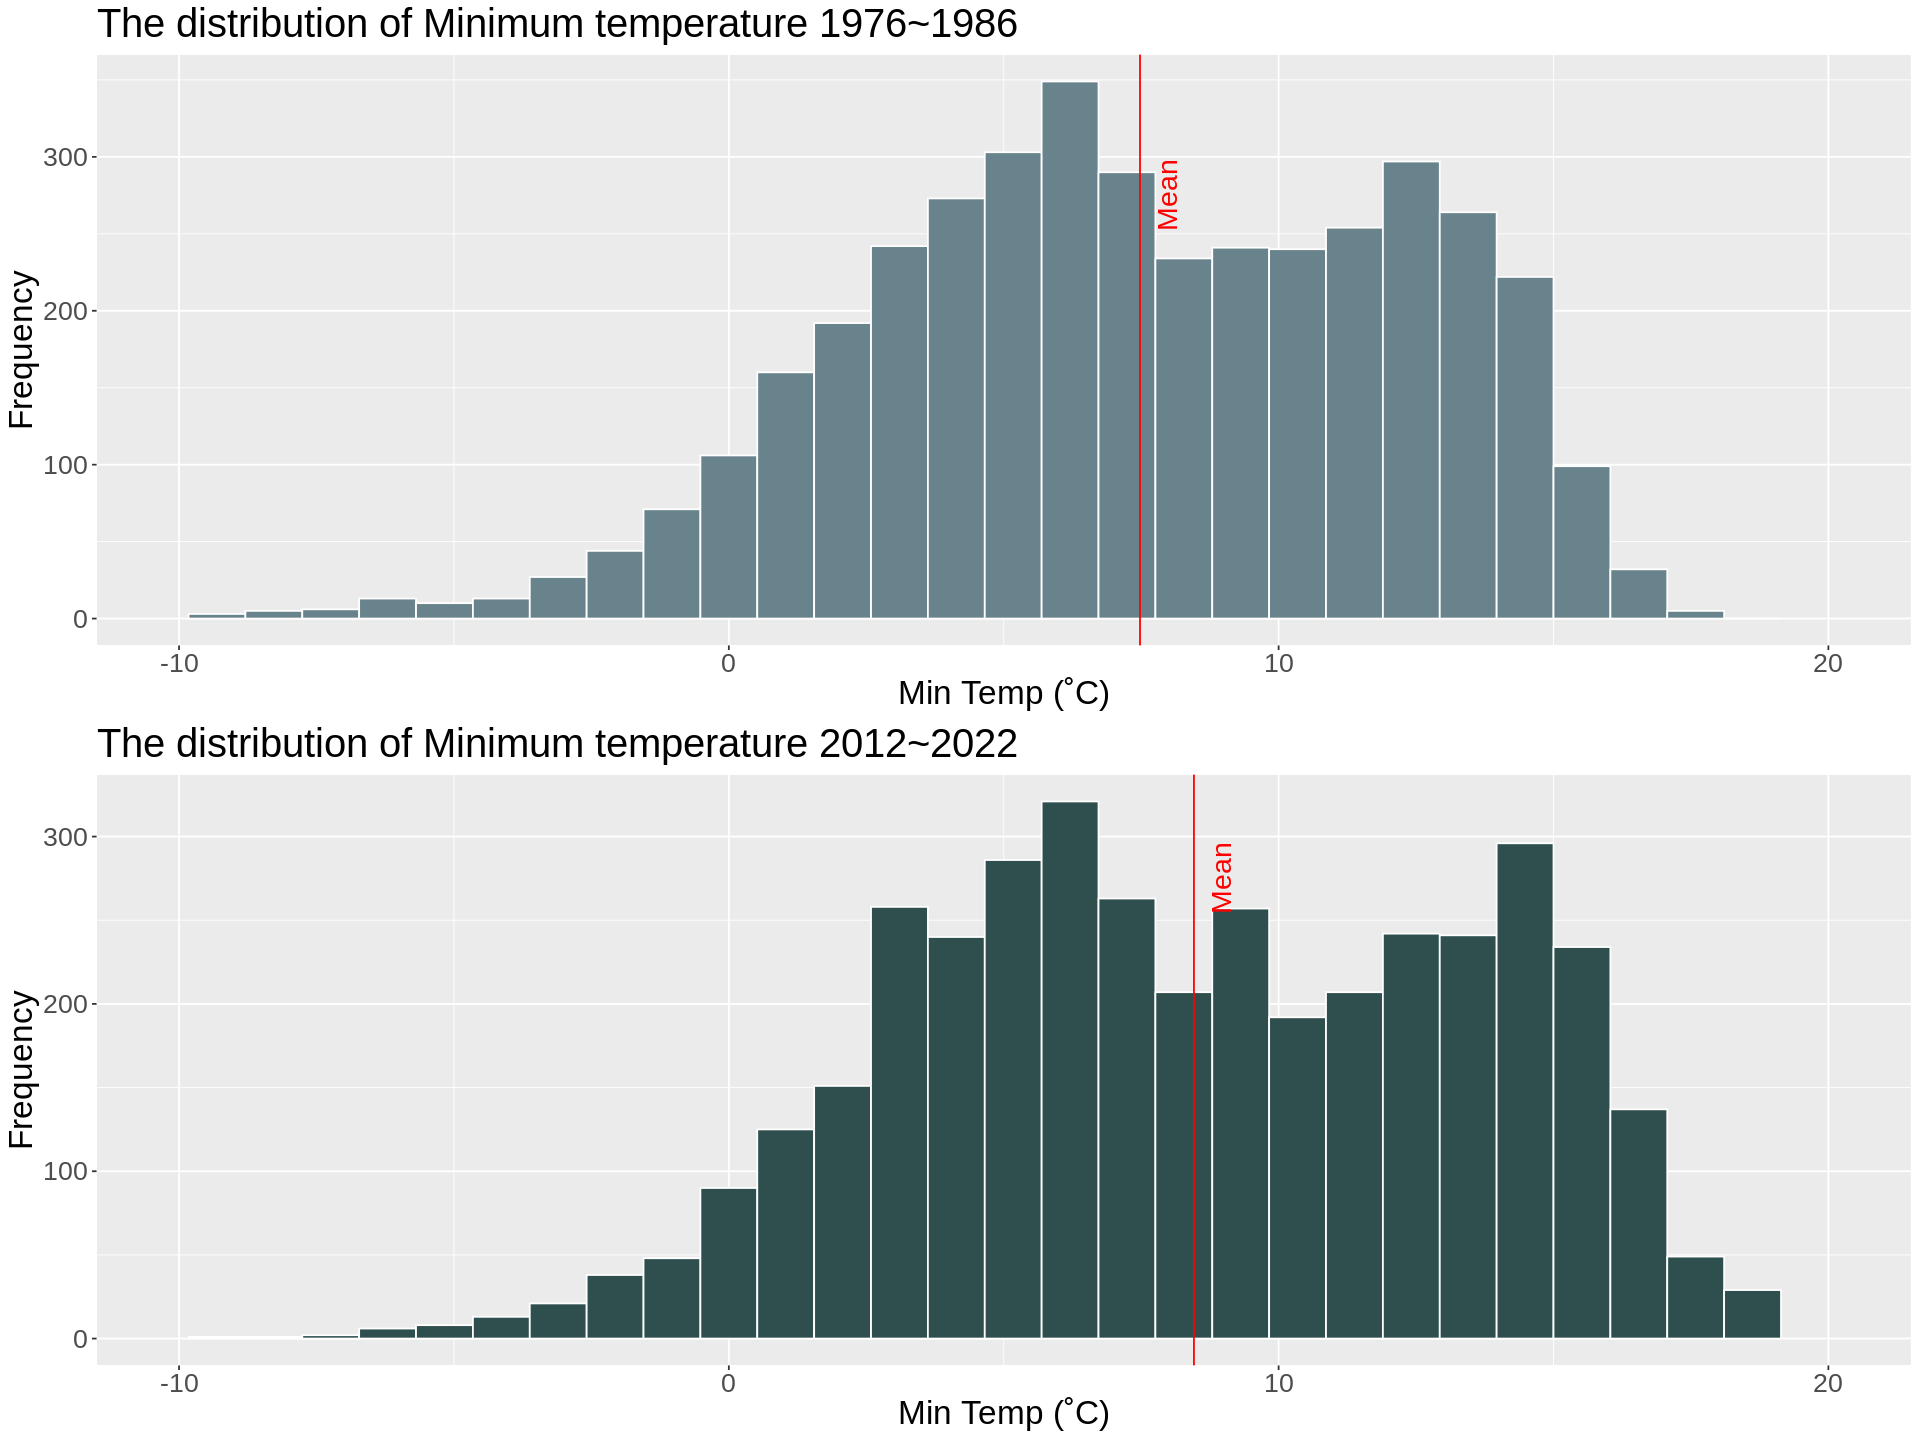

In [4]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$min)
new_mean=mean(new_temps$min)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=min)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 20, by=10),limits=c(-10,20))+
    ggtitle('The distribution of Minimum temperature 1976-1986')+
    xlab('Min Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= old_mean+0.5, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=min)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 20, by=10),limits=c(-10,20))+
    ggtitle('The distribution of Minimum temperature 2012-2022')+
    xlab('Min Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= new_mean+0.5, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

<center>Figure 2. Plots of Minimum Temperature between the two 10-year time periods</center>

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


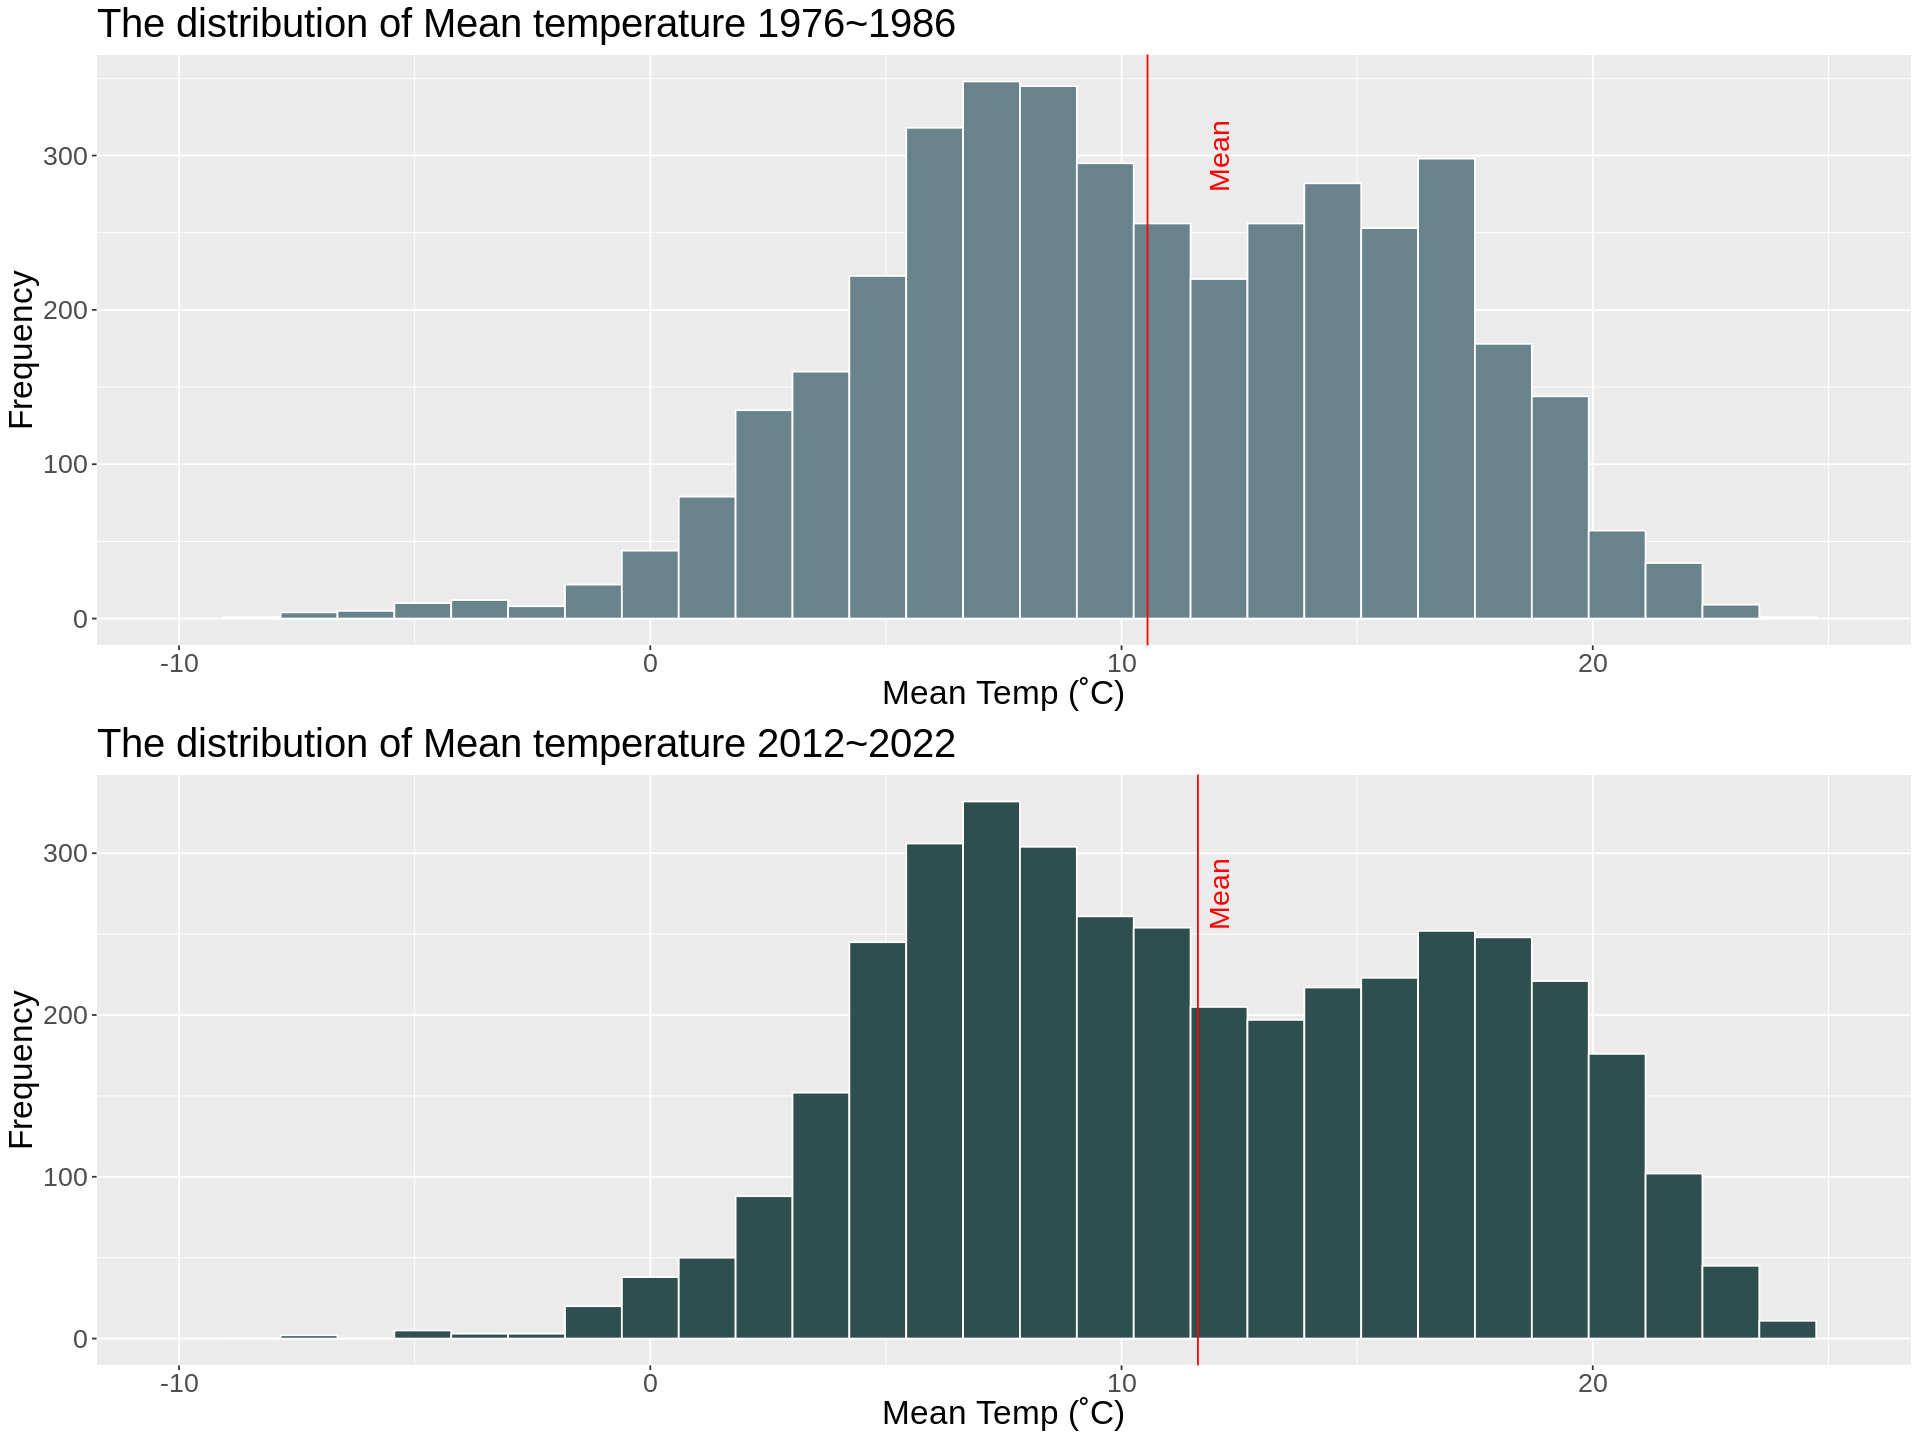

In [5]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$mean)
new_mean=mean(new_temps$mean)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=mean)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 25, by=10),limits=c(-10,25))+
    ggtitle('The distribution of Mean temperature 1976-1986')+
    xlab('Mean Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= new_mean+0.45, y=300, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=mean)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 25, by=10),limits=c(-10,25))+
    ggtitle('The distribution of Mean temperature 2012-2022')+
    xlab('Mean Temp (˚C)')+
    ylab("Frequency") +
    annotate("text", x= new_mean+0.45, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

<center>Figure 3. Plots of Mean Temperature between the two 10-year time periods</center>

In [13]:
# Parameters of interest
means <- c(mean(old_temps$max), mean(old_temps$min), mean(old_temps$mean),
           mean(new_temps$max), mean(new_temps$min), mean(new_temps$mean))
params <- matrix(means, nrow=2, byrow=TRUE)
colnames(params) <- c('Average Max Temp', 'Average Min Temp', 'Average Mean Temp')
rownames(params) <- c('1976-86', '2012-22')
round(params, 2)

,Average Max Temp,Average Min Temp,Average Mean Temp
1976-86,13.58,7.48,10.55
2012-22,14.75,8.46,11.62


<center>Table 2. Average of each column between the two 10-year periods</center>

# Methods: Plan

To conduct our data analysis we will be using the max, min, and mean columns of a sample of two 11-year periods, namely 1976-1986 and 2012-2022. 
This report will be trustworthy and applicable to statistical scientific research on climate change because:
1. Trusted data from the government of BC is being used.
2. Peer-reviewed scientific research and papers will be used to strengthen our report and be used as evidence to prove our findings.
3. Proper coding practices and data wrangling will be used to ensure the best outcome of results.

Although plots and estimates can provide valuable insights into temperature trends, it will likely be insufficient to answer our inferential question with a high degree of confidence and accuracy. This is because the observed differences in temperature between the two time periods may be due to natural variability or other factors, rather than climate change. Therefore, we need to use statistical methods to assess whether the observed differences are statistically significant and not due to chance.

To address this gap, we should provide a hypothesis test and a confidence interval to further support our results. Utilizing a hypothesis test enables us to determine whether there is a statistically significant difference in temperature between the two chosen time periods. 95% confidence interval is useful as it will provide us an estimate of the size of this difference with a measure of uncertainty. 

When we perform a hypothesis test, we will use a two-sample t-test to compare the mean temperatures of the two chosen time periods. We can set up the null hypothesis as there being no significant difference in mean temperature between the two periods, and the alternative hypothesis as there being a significant difference. Calculating the test statistic and p-value, we will be able to decide whether to reject the null hypothesis or not.

To create a confidence interval, we can utilize bootstrapping or asymptotic methods. If we were to perform bootstrapping, we would be required to resample the temperatures with replacement to create a useful bootstrap distribution of sample means. With this, we can calculate a confidence interval. If we were to use an asymptotic method, we would need to rely on a larger sample size in order to assume the distribution will be normal. Moreover, we a larger sample size is required to use our standard error to calculate an accurate confidence level. In our analysis, we hope to compare the two methods and aim to assess their precision and dependability, which in turn, will show clear evidence as to which method provides the most accurate estimate of the difference in temperature.

Additionally, to allow stakeholders to understand the generalizability and solidity of our analysis, we must prepare transparent explanations and the processes we took to get to our result. By providing the transparency of any limitations that were encountered and any assumptions that were made, we can ensure stakeholders that they will be able to make informed decisions based on our results.

<h4>What are the expected findings?</h4>

We expect to find a relatively big change in the difference of temperature between the two chosen timeframes. With the uprise in the concern for climate change, there have been numerous studies that indicate a rise in global temperature. Although we are only looking at one weather station, the information from this analysis will further work as evidence that climate change is real.

# Methods: Analysis

In [7]:
# Check the assumption of equal variance for two sample t-test
vars <- c(var(old_temps$max), var(old_temps$min), var(old_temps$mean),
           var(new_temps$max), var(new_temps$min), var(new_temps$mean))
vars_mtx <- matrix(vars, nrow=2, byrow=TRUE)
colnames(vars_mtx) <- c('Variance of Max Temp', 'Variance of Min temp', 'Variance of Mean temp')
rownames(vars_mtx) <- c('1976-86', '2012-22')
round(vars_mtx, 2)

,Variance of Max Temp,Variance of Min temp,Variance of Mean temp
1976-86,39.56,23.53,29.51
2012-22,45.99,26.54,34.10


<center>Table 2. Variance of max, min, and mean temperature</center>

The variances between time periods of each paramater of interest, max, min and mean temps, are all on the same scale making the assumption of equal variance suitable for this applciation.

In [8]:
# t-test for max temp
( res_max <- t.test(x=old_temps$max, y=new_temps$max, alternative="less",
                    var.equal=TRUE, conf.level=0.95) )


	Two Sample t-test

data:  old_temps$max and new_temps$max
t = -8.0366, df = 7963, p-value = 5.284e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.9366289
sample estimates:
mean of x mean of y 
 13.57509  14.75279 


In [9]:
# t.test for min temp
( res_min <- t.test(x=old_temps$min, y=new_temps$min, alternative="less",
                    var.equal=TRUE, conf.level=0.95) )


	Two Sample t-test

data:  old_temps$min and new_temps$min
t = -8.7479, df = 7963, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.7963017
sample estimates:
mean of x mean of y 
 7.479065  8.459793 


In [10]:
# t.test for mean temp
( res_mean <- t.test(x=old_temps$mean, y=new_temps$mean, alternative="less",
      var.equal=TRUE, conf.level=0.95) )


	Two Sample t-test

data:  old_temps$mean and new_temps$mean
t = -8.4585, df = 7963, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.8609713
sample estimates:
mean of x mean of y 
 10.55173  11.62057 


In [11]:
# Summary

# Use broom package to create tidy dataframe of test outputs
tidy_max <- tidy(res_max)
tidy_min <- tidy(res_min)
tidy_mean <- tidy(res_mean)

# Populate summary table
vals <- c(tidy_max$p.value, tidy_max$conf.low, tidy_max$conf.high,
          tidy_min$p.value, tidy_min$conf.low, tidy_min$conf.high,
          tidy_mean$p.value, tidy_mean$conf.low, tidy_mean$conf.high)
summary <- matrix(vals, nrow=3, byrow=TRUE)
rownames(summary) <- c('Test of Max Temp', 'Test of Min Temp', 'Test of Mean Temp')
colnames(summary) <- c('p-value', 'Confidence Level (lower)', 'Confidence Level (upper)')

summary

,p-value,Confidence Level (lower),Confidence Level (upper)
Test of Max Temp,5.283631e-16,-Inf,-0.9366289
Test of Min Temp,1.311263e-18,-Inf,-0.7963017
Test of Mean Temp,1.595417e-17,-Inf,-0.8609713


<center>Table 3. p-value and confidence interval of min, max, and mean temperature</center>

Both the bootstrapping and asymptotic methods were used to estimate the p-value and confidence interval and gave similar results.

Bootstrapping generally works better with small sample sizes where the population distribution is unknown, while asymptotic methods require mathematical approximations with larger sample sizes and normal distribution. In this case, I believe both methods seem to be equally trustworthys since both provide similar results. This suggests that choosing between the two would not affect the end results. However, if one method were to be selected, bootstrapping would likely be the best method because the population distribution is unknown, making it the more reliable method.

# Discussion

#### Summary of Results

Through our two-sample t-test, the p-value of the mean temperature was found to be quite small, therefore, we reject the null hypothesis in favour of the alternative that the temperatures have increased over the past 50 years. This means that we have found that there is evidence to suggest a changing climate in the modern day via a statistically significant difference in temperature between our two 50-year periods. Moreover, given our calculated confidence interval, this further supports our claim that there is evidence to suggest a statistically significant difference. 

In Figure 1. and 2., we can see an increase in average min and max daily temperature recordings between the two 11-year periods, which suggests that the maximum and minimum temperature experienced each day have been on a gradual increase, signally a changing climate. Referring to Figure 3., we also see a slight increase of the mean temperatures beween the two 11 years. 

In fact, we expected to find these results. Before we began our analysis, we believed that we would only discover more proof of climate change and global warming. After reading multiple peer-reviewed studies regarding climate change, we knew that climate change has been a critical world issue that needed more global attention. Lindsey & Dahlman (2023) stated that the "upward trend in the globally averaged temperature shows that more areas are warming than cooling". This is particularly concerning because it means the world is heating up with no means of stopping. With the rise of floods, droughts, and heatwaves that increase with global mean temperature (Arnell, 2019), government officials and public authorities should be more concerned with global warming. Our findings now further solidify the real and pressing issue of climate change and global warming.

#### Justification of Confidence Interval

We used 95% confidence interval in this study. The 95% confidence interval is only a range of values. It represents that we are 95% confident that this interval could contain the true population parameters (the difference of average min/max/mean daily temperature recordings between our two eras)  within. We conducted our study repeatedly and constructed a 95% confidence interval every time. Therefore, we are 95 % confident the true means are almost certain to be inside this range. 

The confidence interval is influenced by the sample size, standard deviation, and level of confidence chosen. In our study, a larger amount of data selected would lead to a narrower confidence interval and a more accurate prediction. Because this was desirable for the the project, we chose a weather station which had a large record of temperature data.

#### Implications of Type 1 and Type 2 Errors in Terms of our Topic

Type I error occurs as the false positive result. In other words, this would look like finding a siginificant difference in temperature data over the 50 year period, and attributing this to climate change without a significant change in reality. Naturally, this would lead us to an incorrect conclusion about the weather change. 

In contrast, Type II error occurs when our null hypothesis is falsely accepted. In our scenario, this would occur if we would have failed to detect any significant evidence suggesting temperature change attributed to climate change in the past 50 years when in fact there had been a significant difference. 

Because Type I and Type II errors can have a big impact on our conclusion, we had to choose our confidence level carefully. If we set up a unnecessarily high confidence level, it might increase the chances of type II error. On the contrary, if the confidence level was too low, it might have increased the potential of Type I error. 

<h4>What impact could such findings have?</h4>


There are many possible implications our findings could have. 

1. These findings can provide evidence and strengthen the groundwork for the much needed attention and action to address climate change. Global warming has a major impact on the environment and humankind as a whole. Ultimately, the increased frequency and severity of extreme weather events, sporatic changes in precipiation, and rising sea levels, will inevitably impact our agriculture and overall lifestyle (Arnell, 2019). By showcasing the ferocity of climate change, we can increase awareness of the true urgency of this global challenge.

2. These findings can further inform policy decisions at the local, provincial, national, or even international levels. Authorities and government officials are the ones that can truly drive changes in our society by listening to our concerns and implementing measures to reduce our carbon footprint, while also taking action and spreading awareness on climate change. Through this, we can mitigate the negative impact and work towards healing the world we live in.

3. These findings can possibly influence companies and businesses by allowing them to rethink sustainability practices. There are many risks and opportunities for growth with regard to climate change. Understanding the impacts of climate change on temperature patterns and global warming will allow for more informed decision making when it comes to investing and bringing in revenue.

<h4>What future questions could this lead to?</h4>

There are a plethora of questions that this could lead to that, if answered, can deepen our understanding of the impacts of clim. Some may include:

1. How do these local differences in temperature relate to the changes we see provincially? Nationally? Globally?

2. How do changes in temperature over time correspond to climate change, more specifically increased frequency and severity of extreme weather events, sporatic changes in precipiation, and rising sea levels?

3. How do these changes in temperature affect our ecosystems, biodiverity, and the overall environment? How can we mitigate the harm on these vital parts of our Earth?

4. How can we use climate change and temperature data to create better, more effective models to better predict and address global warming?

5. What are the most effective ways to communicate our findings to different influential individuals (government officials, stakeholders, general public, stakeholders etc.) in order to increase awareness and incite a stronger movement for climate change? 

# References
Dahlman, Rebecca Lindsey AND LuAnn. “Climate Change: Global Temperature.” NOAA Climate.gov, https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature. 

Arnell, N. W., et al. “Global and Regional Impacts of Climate Change at Different Levels of Global Temperature Increase.” Climatic Change, vol. 155, no. 3, 2019, pp. 377–391., https://doi.org/10.1007/s10584-019-02464-z. 

### Dataset:

https://climate.weather.gc.ca/climate_data/hourly_data_e.html?hlyRange=1976-01-20%7C2023-03-07&dlyRange=1925-11-01%7C2023-03-07&mlyRange=1925-01-01%7C2007-02-01&StationID=888&Prov=BC&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=0&searchMethod=contains&Month=3&Day=7&txtStationName=Vancouver+Harbour&timeframe=1&Year=2023